# TP0: Introducción a Python para DSP

Este trabajo práctico tiene como objetivo familiarizarte con la generación y análisis básico de señales usando **Python puro**, **NumPy** y **SciPy**.

## Objetivos
1. Definir funciones para generar señales básicas en Python puro (sin bibliotecas externas).
2. Generar señales usando bibliotecas como **NumPy** y **SciPy**.
3. Comprender la diferencia entre listas y arrays, y el beneficio del vectorizado.
4. Practicar operaciones básicas: encontrar máximos y mínimos en señales.


## Ejercicio 1: Señal cuadrada en Python puro

**Tarea:** Crea una función que genere una señal cuadrada de longitud `N` con los primeros `k` valores en `0` y los siguientes `k` en `1`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la señal como una lista.
- Muestra la lista y grafícala usando `matplotlib`.


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


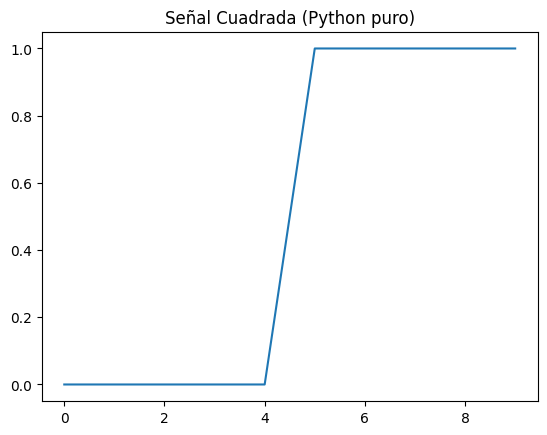

In [1]:
import matplotlib.pyplot as plt

def generar_senal_cuadrada(N, k):
    senial = []
    for i in range(k):
        senial.append(0)
    for i in range(k):
        senial.append(1)
    return senial

senal_cuad = generar_senal_cuadrada(10, 5)
print(senal_cuad)
plt.title('Señal Cuadrada (Python puro)')
plt.plot(senal_cuad)
plt.show()

## Ejercicio 2: Señal triangular en Python puro

**Tarea:** Crea una función que genere una señal triangular que suba desde `0` hasta `M` y luego baje a `0`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la lista y grafícala.


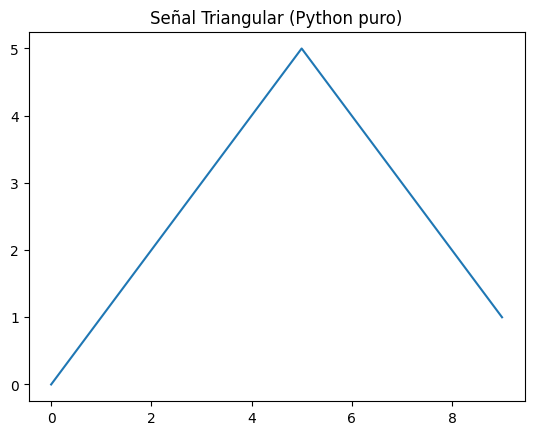

In [2]:
def generar_senal_triangular(M):
    senial = []
    for i in range(M):
        senial.append(i)
    for i in range(M, 0, -1):
        senial.append(i)
    return senial

senal_tria = generar_senal_triangular(5)
plt.title('Señal Triangular (Python puro)')
plt.plot(senal_tria)
plt.show()

## Ejercicio 3: Delta de Dirac en Python puro

**Tarea:** Implementa la función `generar_delta_dirac(longitud, posicion)` que devuelve una lista de ceros con un único `1` en la posición indicada.

**Prueba la función** para `longitud = 10` y `posición = 5`.


In [3]:
def generar_delta_dirac(cantidad, pos):
    if pos >= cantidad:
        return 'Error: posición fuera de rango'
    delta = [0]*cantidad
    delta[pos] = 1
    return delta

print(generar_delta_dirac(10,5))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


## Ejercicio 4: Generación con NumPy/SciPy

Repite los ejercicios anteriores usando **NumPy/SciPy** y grafíca las señales junto con su **base de tiempo** (`t`) generada con `np.linspace()` o `np.arange()`.

**Pregunta:** ¿Cuál es la diferencia entre usar `linspace` y `arange`?

**Pistas:**
- Señal cuadrada: `sig.square()`.
- Señal senoidal: `np.sin()`.
- Señal triangular: `sig.sawtooth()`
- Señal delta de dirac: `np.dirac()` (o `np.concatenate()` con `zeros` y `ones`).


In [4]:
#Linspace devuelve números espaciados uniformemente en el rango especificado y arange devuelve números dentro de un rango en pasos determinado. 

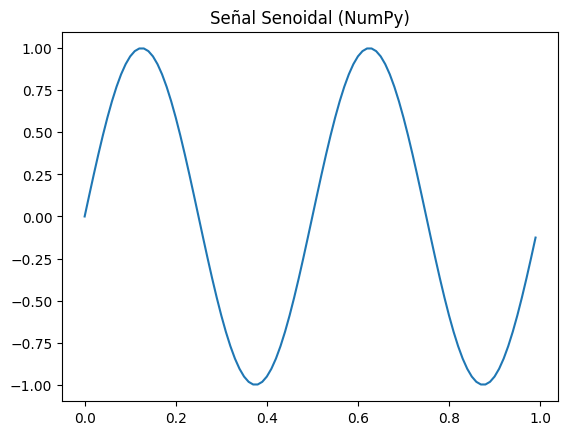

In [5]:
import numpy as np

# Señal senoidal con NumPy
frec = 2
f_muestreo = 100
t = np.arange(0, 1, 1/f_muestreo)
senal_seno = np.sin(2 * np.pi * frec * t)
plt.title('Señal Senoidal (NumPy)')
plt.plot(t, senal_seno)
plt.show()

## Ejemplo: Señal cuadrada con `scipy.signal`


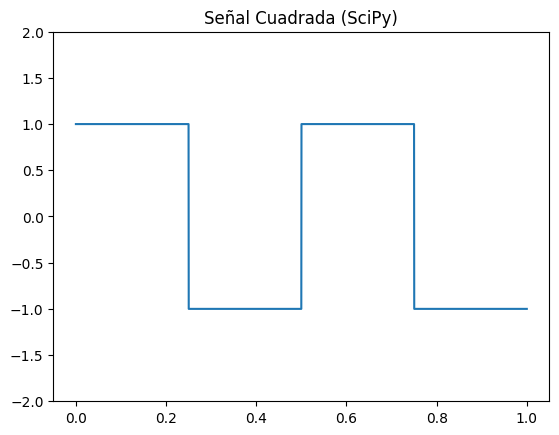

In [6]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
# Señal Cuadrada con NumPy
frec_muestreo = 5000
frec_senial = 2
t = np.arange(0,1,1/frec_muestreo)
senal_cuadrada_scipy = sig.square(2 * np.pi * frec_senial * t)

plt.title('Señal Cuadrada (SciPy)')
plt.plot(t, senal_cuadrada_scipy)
plt.ylim(-2, 2)
plt.show()

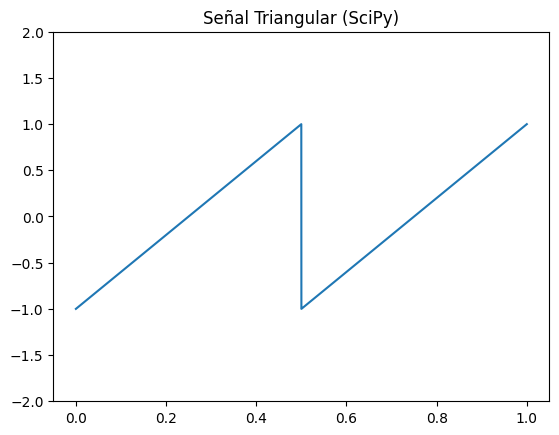

In [7]:
import scipy.signal as sig
# Señal Triangular con NumPy
frec_muestreo = 5000
frec_senial = 2
t = np.arange(0,1,1/frec_muestreo)
senal_triangular_scipy = sig.sawtooth(2 * np.pi * frec_senial * t)

plt.title('Señal Triangular (SciPy)')
plt.plot(t, senal_triangular_scipy)
plt.ylim(-2, 2)
plt.show()

In [8]:
import scipy.signal as sig
# Señal Delta Dirac con NumPy

senal_dirac_scipy = sig.unit_impulse(10,5)
print(senal_dirac_scipy)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Ejercicio 6: Máximos y mínimos

Encuentra el valor máximo y mínimo de una señal y sus posiciones:

- Primero con Python puro (listas y bucles).
- Luego con NumPy (`np.max`, `np.min`, `np.argmax`, `np.argmin`).


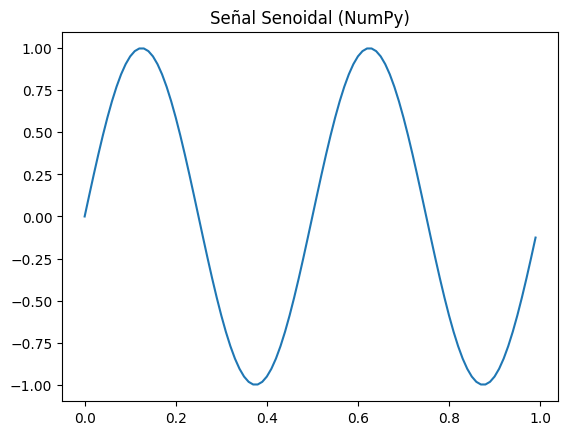

Sin NumPy
Maximos
0.9980267284282716
12
Minimos
-0.9980267284282716
37
----------------------
Con NumPy
Maximos
0.9980267284282716
12
Minimos
-0.9980267284282716
37


In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Señal senoidal con NumPy
frec = 2
f_muestreo = 100
t = np.arange(0, 1, 1/f_muestreo)
senal_seno = np.sin(2 * np.pi * frec * t)
plt.title('Señal Senoidal (NumPy)')
plt.plot(t, senal_seno)
plt.show()

# Sin NumPy 

maximos=0
posicion_max=0
minimos=0
posicion_min=0

for i in range(f_muestreo):
    if (np.sin(2 * np.pi * frec * t[i])) > maximos:
        maximos=np.sin(2 * np.pi * frec * t[i])
        posicion_max=i
        #print(i)
        #print(np.sin(2 * np.pi * frec * t[i]))
    if (np.sin(2 * np.pi * frec * t[i])) < minimos:
        minimos=(np.sin(2 * np.pi * frec * t[i]))
        posicion_min=i
        #print(i)
        #print(np.sin(2 * np.pi * frec * t[i]))

print("Sin NumPy")    
print("Maximos")
print(maximos)
print(posicion_max)
print("Minimos")
print(minimos)
print(posicion_min)
print("----------------------")

# Con NumPy
print("Con NumPy")
print("Maximos")
max_np=senal_seno.max()
max_pos_np = senal_seno.argmax()
print(max_np)
print(max_pos_np)
print("Minimos")
min_np=senal_seno.min()
min_pos_np = senal_seno.argmin()
print(min_np)
print(min_pos_np)

